## LAB<sup>7-5</sup> XOR 연산이 가능한 다층 퍼셉트론 만들기 (p.260)

**실습 목표**

역전파 모델을 아래와 같은 다층 퍼셉트론을 훈련시켜 XOR 연산을 수행하게 하라. 이 퍼셉트론의 출력은 y<sub>1</sub>이 켜지면 참, y<sub>2</sub>가 켜지면 거짓을 나타낸다.

### 1. 넘파이와 맷플롯립을 임포트하여 수치 데이터를 다루고 가시화할 수 있게 한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 연결강도 U와 W를 난수를 발생시켜 준비한다. 실습 목표에 나타나 있는 퍼셉트론을 구현하기 위해서는 각각 (2,3)과 (3,2)의 크기를 갖는다. 학습률은 1.0으로 설정해 보겠다.

In [ ]:
U = np.random.rand(2,3)    # 연결강도 U
W = np.random.rand(3,2)    # 연결강도 W
learning_rate = 1.0        # 학습률 η

### 3. 퍼셉트론이 사용할 활성화 함수로 시그모이드 함수를 구현하고, 이 함수의 미분함수도 구현한다.

In [ ]:
def sigmoid(v):
  return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
  s = sigmoid(v)
  return s*(1-s)

### 4. 입력은 2차원 벡터인 input 변수, 은닉층 3개 노드들은 입력에서 넘어오는 신호를 합산하는 h_sum, 활성화 함수를 거친 h_out, 활성화 함수의 미분함수를 거친 h_deriv, 그리고 역전파 단계에서 넘겨받을 오차 h_error, 그리고 은닉계층이 아래로 내려보낼 델타 벡터 h_delta를 준비한다. 이것들은 모두 설계에 따라 3차원 벡터이다. 출력 계층은 2차원 벡터이고 동일한 준비를 한다.

순전파시 계산될 값들 : $ {h^\Sigma} \ \ {h^\phi} \ \ {h^\phi}' $

역전파시 계산될 값들 : $ {e^h} \ \ {\delta^h} $

순전파시 계산될 값들 : $ {y^\Sigma} \ \ {y^\phi} \ \ {y^\phi}'$

역전파시 계산될 값들 : $ {e^y} \ \ {\delta^y} $

In [ ]:
input = np.zeros(2)

# 순전파시 계산될 값들
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
# 역전파시 계산된 값들
h_error, h_delta = np.zeros(3), np.zeros(3)

# 순전파시 계산될 값들
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산된 값들
y_error, y_delta = np.zeros(2), np.zeros(2)

### 5. 입력을 은닉층으로 전파하는 순전파 과정을 구현하자.

은닉층에서 합산된 값 : $ h^\Sigma = U^T \mathbf x $

은닉층의 활성화 값 : $ h^\phi = \phi(h^\Sigma)$ 

은닉층 활성화 미분치 : $ h^{\phi'} = \phi'(h^\Sigma) $

In [ ]:
def forward_xh(x):
  global input, h_sum, h_out, h_deriv
  input   = x
  h_sum   = U.T.dot(input)              # 은닉층에서 합산된 값
  h_out   = sigmoid(h_sum)              # 은닉층의 활성화 값
  h_deriv = derivative_sigmoid(h_sum)   # 은닉층 활성화 미분치

### 6. 은닉층에서 출력층으로 전파하는 순전파 과정도 비슷하게 구현된다. 다만 여기서는 내부에 있는 값을 이용하므로 입력을 따로 받지 않는다.

출력층에서 합산된 값 : $ y^\Sigma = W^T \mathbf x $

출력층의 활성화 값 : $ y^\phi = \phi(y^\Sigma)$ 

출력층 활성화 미분치 : $ y^{\phi'} = \phi'(y^\Sigma) $

In [ ]:
def forward_hy():
  global y_sum, y_out, y_deriv
  y_sum   = W.T.dot(h_out)              # 출력층에서 합산된 값
  y_out   = sigmoid(y_sum)              # 출력층의 활성화 값
  y_deriv = derivative_sigmoid(y_sum)   # 출력층 활성화 미분치

### 7. 출력을 목표치와 비교하여 오차를 구하는 것은 다음과 같다.

In [ ]:
def compute_error(target):
  return y_out - target                 # 오차의 계산

### 8. 이제 역전파 단계를 구현하자. 출력 계층의 동작은 출력값과 목표값의 차이를 이용한다. 이 오차를 미분치에 곱하여 아래 계층으로 내려 보낼 델타 벡터를 계산한다. 그리고 이 델타 벡터와 이전 단계의 출력을 이용하여 연결강도를 수정한다.

출력층 오차 : $ e^y $

출력층에서 보내는 델타: $ \delta^y = y^{{\phi}'} \otimes e^y $

연결강도 갱신: $ \Delta W = \eta h^{\phi} {\delta^y}^T $

In [ ]:
def backward_y(error):
  global y_error, y_delta, W
  y_error = error                                 # 출력층 오차
  y_delta = y_deriv * y_error                     # 출력층에서 보내는 델타
  ## 연결강도 W 수정
  dW = -learning_rate * np.outer(h_out, y_delta)  # 연결 강도 갱신
  W = W + dW

### 9. 은닉 계층에서 이루어지는 역전파도 출력 계층과 크게 다르지 않다. 다만 사용하는 오차가 다를 뿐이다. 이 계층에서 사용하는 오차는 출력 계층에서 뒤로 넘겨준 델타 벡터가 두 계층을 연결하는 연결벡터 행렬에 곱해져 전달된다.

은닉층 오차 : $ e^h = W \delta^y $

은닉층에서 보내는 델타: $ \delta^h = h^{{\phi}'} \otimes e^h $

연결강도 갱신: $ \Delta U = \eta x^{\phi} {\delta^h}^{\mathrm T} $

In [ ]:
def backward_h():
  global h_error, h_delta, U
  h_error = W.dot(y_delta)                        # 은닉층 오차
  h_delta = h_deriv * h_error                     # 은닉층에서 보내는 델타
  ## 연결강도 U 수정
  dU = -learning_rate * np.outer(input, h_delta)  # 연결 강도 갱신
  U = U + dU

### 10. 퍼셉트론을 훈련 시키는 것은 입력과 목표를 제공해야 한다. 아래 train() 함수는 입력 데이터를 이용하여 순전파를 실핼하고, 목표값과 비교하여 오차를 계산한다. 그리고 이 오차를 이용하여 역전파를 실시한다. 훈련을 할 때마다 계산된 오차의 제곱을 반환하게 하자.

In [ ]:
def train(x, target):
  forward_xh(x)
  forward_hy()
  e = compute_error(target)
  backward_y(e)
  backward_h()
  return e**2

### 11. 다음으로 1000번의 훈련을 실시하도록 하였다. 출력은 참일 경우에는 (1,0), 거짓일 경우에는 (0,1)이 되도록 하였다. 하나의 노드만을 출력으로 사용하여 0 또는 1을 출력하는 방식도 있지만, 신경망에서는 서로 다른 범주에 속하는 결과를 구분할 때는 다수의 출력 노드를 사용해 각 범주마다 하나의 출력 노드가 활성화되게 하는 방법을 선호한다. 이 경우는 출력 노드가 두 개이다. 앞서 구현한 train() 함수를 이용하여 가능한 입력 4개에 대해 목표값을 주고 훈련하였다. 모든 데이터에 대한 훈련이 한 번 이루어질 때마다 제곱 오차를 누적한 결과를 loss 리스트에 추가한다.

In [ ]:
loss = []

for i in range(1000):
  e_accum = 0
  true  = np.array([1,0])
  false = np.array([0,1])
  e_accum += train(np.array([0,0]), false)  # 훈련 데이터 1
  e_accum += train(np.array([0,1]), true)   # 훈련 데이터 2
  e_accum += train(np.array([1,0]), true)   # 훈련 데이터 3
  e_accum += train(np.array([1,1]), false)  # 훈련 데이터 4
  loss.append(e_accum)

### 12. 훈련 중에 계산된 오차를 화면에 그려보자. 난수값에 의해 아래 그래프는 다소 차이가 날 수 있다.

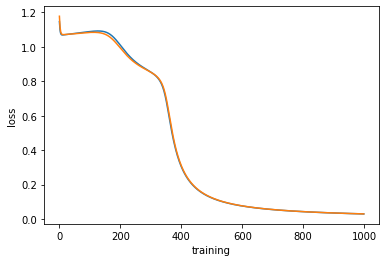

In [ ]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

### 13. 테스트를 할 수 있는 함수를 만들어 보자. 입력 데이터의 리스트 X를 넘기면 각 인스턴스에 대해 순전파를 실시해 얻은 출력을 y_hat에 모아 리턴한다.

In [ ]:
def test(X):
  y_hat = []
  for x in X:
    forward_xh(x)
    forward_hy()
    y_hat.append(y_out)
  return y_hat

### 14. 네 가지 가능한 모든 경우를 입력으로 제공해 결과를 확인하자. 결과는 제대로 된 XOR 연산이 수행됨을 보인다.

In [ ]:
test(np.array([[0,0], [0,1], [1,0], [1,1]]))

[array([0.12517319, 0.87460979]),
 array([0.92216186, 0.07798713]),
 array([0.92146328, 0.07869181]),
 array([0.0388725 , 0.96100364])]